<a href="https://www.kaggle.com/code/aggarwalbhavya/food-delivery-cost-profability-analysis?scriptVersionId=192120629" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Executive Summary

In this report, we analyze the cost, revenue, and profitability of our business operations to identify key areas for improvement. Based on our findings, we propose strategies to reduce costs and boost revenue, and simulate their impact on overall profitability. The simulation results suggest significant improvements in profit margins, indicating the effectiveness of the proposed strategies.

# Background and Context

A food delivery service has been experiencing fluctuating profits, prompting a detailed analysis to identify cost drivers and revenue opportunities.

# Objectives

* To analyze cost, revenue, and profitability.
* To propose strategies for cost reduction and revenue enhancement.
* To simulate the impact of these strategies on overall profitability.

# Data Overview

**DataSet Description**:

The dataset includes order-level data with variables such as order value, discounts, payment processing fees, delivery fees, commission fees, and profit.

**Key Variables**:
* **Order ID**: unique indentifier for each order
* **Customer ID**: unique identifier for each customer
* **Restaurant ID**: unique identifier for each restaurant
* **Order Date and Time**: timestamp indicating when order was placed
* **Delivery Date and Time**: timestamp indicating when order was delivered
* **Order Value**: total value of the order
* **Delivery Fee**: fee charged for delivering the order
* **Payment Method**: method used by the customer to pay for the order
* **Discounts and Offers**: type of discount or promotional offers applied to the offer
* **Commission Fee**: revenue earned from commissions charged to the restaurant
* **Payment Processing Fee**: fee charged for processing the customer's payment
* **Refunds and Chargebacks**: amount refunded to the customer or chargebacks incurred

In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.relativedelta import relativedelta
pd.options.display.float_format = '{:.2f}'.format

# Reading the data set

In [3]:
food_delivery_cost = pd.read_csv('/kaggle/input/food-delivery-cost-analysis/food delivery costs.csv')
food_delivery_cost.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [4]:
food_delivery_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [5]:
food_delivery_cost.describe()

,Order ID,Order Value,Delivery Fee,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,500.50,1053.97,28.62,126.99,29.83,28.30
std,288.82,530.98,16.96,43.06,11.63,49.61
min,1.00,104.00,0.00,50.00,10.00,0.00
25%,250.75,597.75,20.00,90.00,20.00,0.00
50%,500.50,1038.50,30.00,127.00,30.00,0.00
75%,750.25,1494.00,40.00,164.00,40.00,50.00
max,1000.00,1995.00,50.00,200.00,50.00,150.00


In [6]:
food_delivery_cost['Payment Method'].value_counts()

Payment Method
Cash on Delivery    357
Credit Card         337
Digital Wallet      306
Name: count, dtype: int64

# Data Cleaning

Standardizing the **date time formats** in the dataset

In [7]:
# Converting the Order Date and Time to standardized datetime format
food_delivery_cost['Order Date and Time'] = pd.to_datetime(food_delivery_cost['Order Date and Time'])
food_delivery_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order ID                1000 non-null   int64         
 1   Customer ID             1000 non-null   object        
 2   Restaurant ID           1000 non-null   object        
 3   Order Date and Time     1000 non-null   datetime64[ns]
 4   Delivery Date and Time  1000 non-null   object        
 5   Order Value             1000 non-null   int64         
 6   Delivery Fee            1000 non-null   int64         
 7   Payment Method          1000 non-null   object        
 8   Discounts and Offers    815 non-null    object        
 9   Commission Fee          1000 non-null   int64         
 10  Payment Processing Fee  1000 non-null   int64         
 11  Refunds/Chargebacks     1000 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(5)
memory 

In [8]:
# Converting the Delivery Date and Time to standardized datetime format
food_delivery_cost['Delivery Date and Time'] = pd.to_datetime(food_delivery_cost['Delivery Date and Time'])
food_delivery_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order ID                1000 non-null   int64         
 1   Customer ID             1000 non-null   object        
 2   Restaurant ID           1000 non-null   object        
 3   Order Date and Time     1000 non-null   datetime64[ns]
 4   Delivery Date and Time  1000 non-null   datetime64[ns]
 5   Order Value             1000 non-null   int64         
 6   Delivery Fee            1000 non-null   int64         
 7   Payment Method          1000 non-null   object        
 8   Discounts and Offers    815 non-null    object        
 9   Commission Fee          1000 non-null   int64         
 10  Payment Processing Fee  1000 non-null   int64         
 11  Refunds/Chargebacks     1000 non-null   int64         
dtypes: datetime64[ns](2), int64(6), object(4)
memory 

In [9]:
food_delivery_cost.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


Adding **Order Fulfillment Time** parameter in minutes which processes the time taken from the time of Order Placement to Successful Delivery of an order.

In [10]:
# Adding a new column to calculate the time taken to fulfill an order aka from it being place
# to it being delivered (in minutes)
def calculate_duration (start, end):
    duration = relativedelta(end, start)
    return duration.hours*60 + duration.minutes

food_delivery_cost['Order Fulfillment Time'] = food_delivery_cost.apply(lambda row: calculate_duration(row['Order Date and Time'], row['Delivery Date and Time']), axis = 1)
food_delivery_cost.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Order Fulfillment Time
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,88
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,35
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,58
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0,46
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,89


In [11]:
# checking if all rows have received some values
food_delivery_cost['Order Fulfillment Time'].isnull().sum()

0

Processing the **Order Date and Time** for use in the EDA to fetch different aspects of the order making process.
* Categorizing order_time based on hour
* Extracting order_date 
* Extracting order_day

In [12]:
# Extracting relevant information from Order Date and Time 
# 1. Categorizing order_time based on hour
def categorize_order_time (hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 16:
        return 'Afternoon'
    elif 16 <= hour < 20:
        return 'Evening'
    elif 20 <= hour < 24:
        return 'Night'
    else:
        return 'Midnight'
    
food_delivery_cost['order_time'] = food_delivery_cost['Order Date and Time'].dt.hour.apply(categorize_order_time)
food_delivery_cost.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Order Fulfillment Time,order_time
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,88,Midnight
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,35,Night
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,58,Morning
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0,46,Night
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,89,Midnight


In [13]:
# 2. Extracting order_date
food_delivery_cost['order_date'] = food_delivery_cost['Order Date and Time'].dt.date
food_delivery_cost.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Order Fulfillment Time,order_time,order_date
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,88,Midnight,2024-02-01
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,35,Night,2024-02-02
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,58,Morning,2024-01-31
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0,46,Night,2024-01-16
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,89,Midnight,2024-01-29


In [14]:
# 3. Extracting order_day
food_delivery_cost['order_day'] = food_delivery_cost['Order Date and Time'].dt.day_name()
food_delivery_cost.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Order Fulfillment Time,order_time,order_date,order_day
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,88,Midnight,2024-02-01,Thursday
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,35,Night,2024-02-02,Friday
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,58,Morning,2024-01-31,Wednesday
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0,46,Night,2024-01-16,Tuesday
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,89,Midnight,2024-01-29,Monday


Handling **Discounts and Offers** to replace *NaN* values with *No Discount equivalent* and calculating the discount amount.

* Discount Amount = Discount Percentage * Order Value *(for % discounts)*

* Discount Amount = Discount Amount *(for off promotionals)*

In [15]:
# replacing null values with No Discount
food_delivery_cost['Discounts and Offers'] = food_delivery_cost['Discounts and Offers'].fillna('No Discount')
food_delivery_cost['Discounts and Offers'].sample(10)

361     No Discount
152             10%
480     No Discount
89        5% on App
328             10%
279             10%
795    15% New User
133    50 off Promo
881             10%
944    15% New User
Name: Discounts and Offers, dtype: object

In [16]:
# function for fetching only the % discounts from data
def percentage_discount (offer) :
    offer = str(offer)
    if '%' in offer:
        return int(offer.split("%")[0])
    else:
        return 0
    
# function for fetching the discounted amount from data
def amount_discount (offer) :
    offer = str(offer)
    if 'off' in offer:
        return int (offer.split("off")[0])
    elif 'No Discount' in offer:
        return 0
    else:
        return 0
    
# creating new columns to store percentage_discount and amount_discount values
food_delivery_cost['discount_percentages'] = food_delivery_cost['Discounts and Offers'].apply(percentage_discount)
food_delivery_cost['discount_amount'] = food_delivery_cost['Discounts and Offers'].apply(amount_discount)
food_delivery_cost.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Order Fulfillment Time,order_time,order_date,order_day,discount_percentages,discount_amount
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,88,Midnight,2024-02-01,Thursday,5,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,35,Night,2024-02-02,Friday,10,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,58,Morning,2024-01-31,Wednesday,15,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,No Discount,146,27,0,46,Night,2024-01-16,Tuesday,0,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,89,Midnight,2024-01-29,Monday,0,50


In [17]:
# Discount_amount is standardized by filling up spaces with values having a discount percentage
food_delivery_cost.loc[food_delivery_cost['discount_amount'] == 0, 'discount_amount'] = (food_delivery_cost['Order Value'] * food_delivery_cost['discount_percentages'] / 100).astype(float)
food_delivery_cost.head()

/tmp/ipykernel_33/3609309270.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 95.7   98.6  140.55   0.    43.9   15.15  26.    83.15  49.1   43.4
 270.     0.    94.95   0.   148.8   75.6   70.7   85.7   82.    46.35
   0.    96.85  39.45 181.1  150.15  67.    23.25   0.     0.     0.
  94.5   55.4    8.8   32.9  138.1   69.35  21.5  130.5   99.2  189.1
  83.65  78.7    0.    69.95   0.    59.7   52.8  134.7  121.4   57.9
  55.7  236.1   46.4   47.9  179.8  177.8  228.45  52.8   88.   135.3
 166.65  91.1    0.    60.7   71.35  60.     0.    34.85  39.75  56.1
   0.    31.95 163.65  90.9   45.9  283.65 203.7   78.25   0.   199.65
  40.4    0.    11.85  95.4    0.    84.8    0.    72.3    0.     0.
 157.3    0.    51.9  178.8   69.95  58.55  46.5  143.1   75.   261.75
 163.95 119.1   31.95 183.2   65.7   50.     0.     0.    61.8  159.1
   0.     0.    58.05  43.2  127.8  253.5  184.5   98.7   28.5  1

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Order Fulfillment Time,order_time,order_date,order_day,discount_percentages,discount_amount
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,88,Midnight,2024-02-01,Thursday,5,95.70
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,35,Night,2024-02-02,Friday,10,98.60
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,58,Morning,2024-01-31,Wednesday,15,140.55
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,No Discount,146,27,0,46,Night,2024-01-16,Tuesday,0,0.00
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,89,Midnight,2024-01-29,Monday,0,50.00


In [18]:
# verifying data
food_delivery_cost[['discount_percentages', 'discount_amount']]

,discount_percentages,discount_amount
0,5,95.70
1,10,98.60
2,15,140.55
3,0,0.00
4,0,50.00
...,...,...
995,5,41.25
996,0,0.00
997,0,0.00
998,15,212.10


Finding out **commission_percentage** based on commission fee and order value.

In [19]:
food_delivery_cost['commision_percentage'] = (food_delivery_cost['Commission Fee'] / food_delivery_cost['Order Value'] * 100).astype(float)
food_delivery_cost.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Order Fulfillment Time,order_time,order_date,order_day,discount_percentages,discount_amount,commision_percentage
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,88,Midnight,2024-02-01,Thursday,5,95.70,7.84
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,35,Night,2024-02-02,Friday,10,98.60,20.08
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,58,Morning,2024-01-31,Wednesday,15,140.55,20.81
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,No Discount,146,27,0,46,Night,2024-01-16,Tuesday,0,0.00,9.98
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,89,Midnight,2024-01-29,Monday,0,50.00,6.53


Calculating **Total Cost**, **Revenue** and **Profit**
* Total Cost = Delivery Fee + Payment Processing Fee + Discount Amount
* Revenue = Commission Fee
* Profit = Total Cost - Revenue

In [20]:
food_delivery_cost['total_cost'] = food_delivery_cost['Delivery Fee'] + food_delivery_cost['Payment Processing Fee'] + food_delivery_cost['discount_amount']
food_delivery_cost['revenue'] = food_delivery_cost['Commission Fee']
food_delivery_cost['profit'] = food_delivery_cost['total_cost'] - food_delivery_cost['revenue']

In [44]:
food_delivery_cost.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,...,Order Fulfillment Time,order_time,order_date,order_day,discount_percentages,discount_amount,commision_percentage,total_cost,revenue,profit
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,...,88,Midnight,2024-02-01,Thursday,5,95.70,7.84,142.70,150,-7.30
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,...,35,Night,2024-02-02,Friday,10,98.60,20.08,161.60,198,-36.40
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,...,58,Morning,2024-01-31,Wednesday,15,140.55,20.81,215.55,195,20.55
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,No Discount,146,...,46,Night,2024-01-16,Tuesday,0,0.00,9.98,77.00,146,-69.00
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,...,89,Midnight,2024-01-29,Monday,0,50.00,6.53,130.00,130,0.00


# Explaratory Data Analysis

> ## Order Data Analysis

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


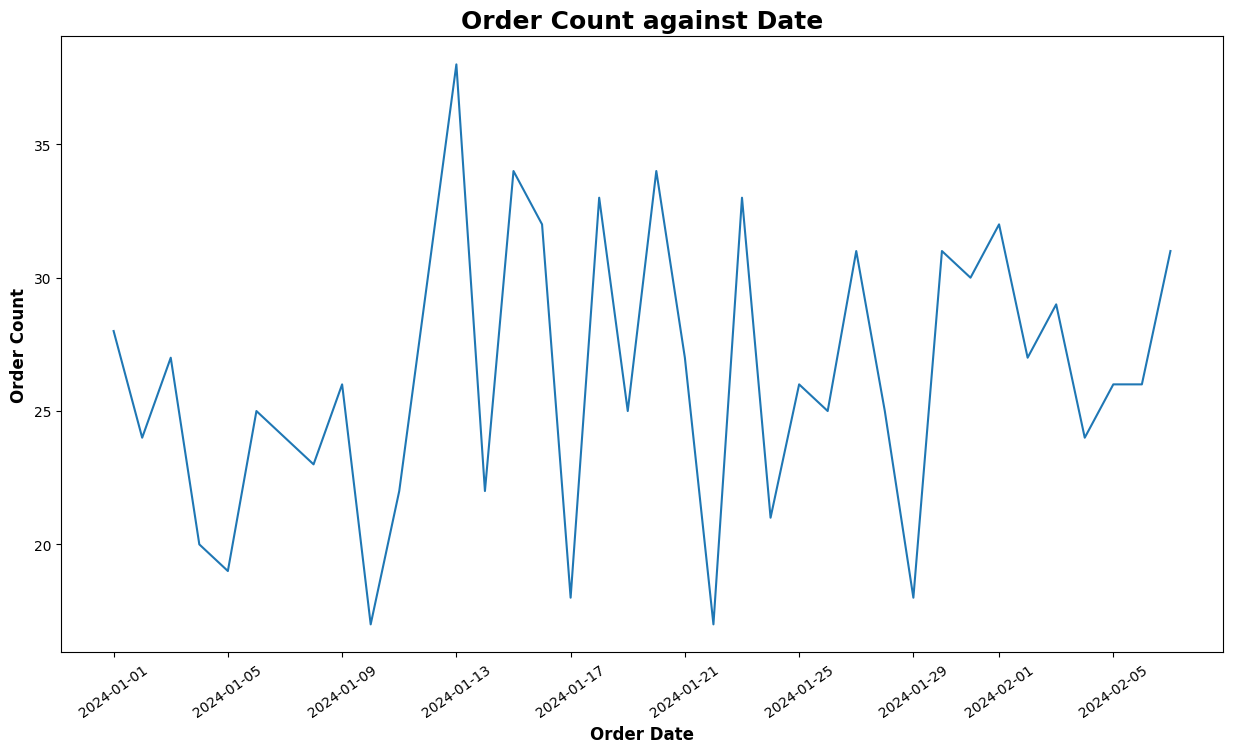

In [22]:
# Orders Over Dates
order_by_date = food_delivery_cost.groupby('order_date')['Order ID'].count().reset_index()
plt.figure(figsize = (15,8))
sns.lineplot(
    data = order_by_date, 
    x = order_by_date['order_date'], 
    y = order_by_date['Order ID']
)
plt.xlabel('Order Date', fontsize = 12, fontweight = 'semibold')
plt.ylabel('Order Count', fontsize = 12, fontweight = 'semibold')
plt.title('Order Count against Date', fontsize = 18, fontweight = 'bold')
plt.xticks(rotation = 35)
plt.show()

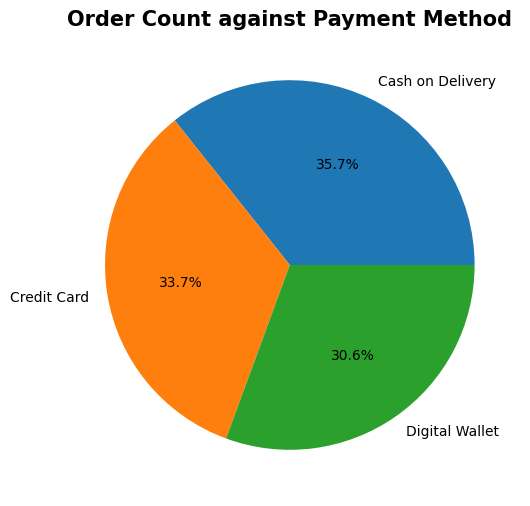

In [23]:
# Order Count Based on Payment Methods
payment_method = food_delivery_cost['Payment Method'].value_counts()
plt.figure(figsize = (8, 6))
plt.pie(
    x = payment_method, 
    labels = payment_method.index, 
    autopct = "%1.1f%%"
)
plt.title("Order Count against Payment Method", fontsize = 15, fontweight = 'bold')
plt.show()

All three payment methods have an **approximate equal** split.

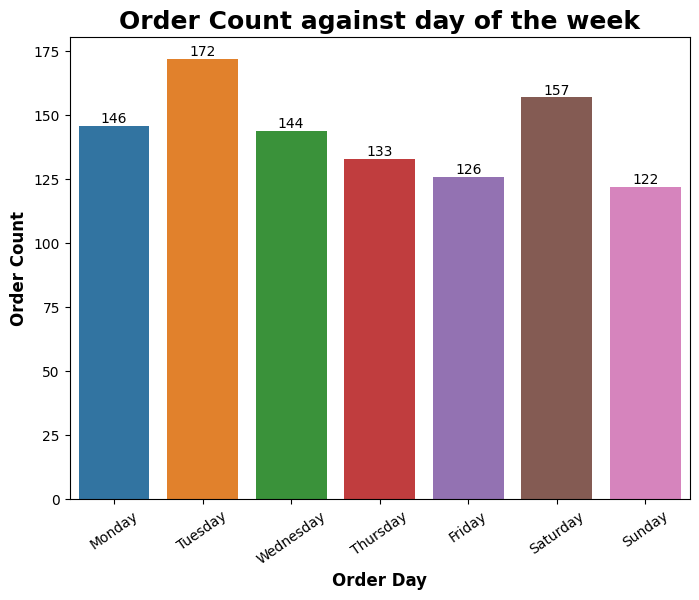

In [24]:
# Order Count against Days of week
plt.figure(figsize = (8, 6))
ax1 = sns.countplot(
    data = food_delivery_cost, 
    x = 'order_day', 
    order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
plt.xlabel('Order Day', fontsize = 12, fontweight = 'semibold')
plt.ylabel('Order Count', fontsize = 12, fontweight = 'semibold')
plt.title("Order Count against day of the week", fontsize = 18, fontweight = 'bold')
plt.xticks(rotation = 35)
ax1.bar_label(ax1.containers[0], fmt = "%d", label_type = "edge", color = "black")
plt.show()

Most orders received are on **Tuesday** and **Saturday**.

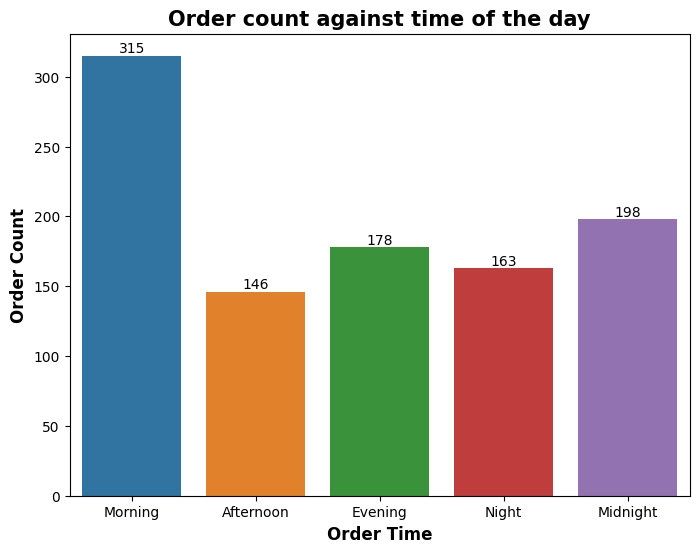

In [25]:
# Order count against time of the day
plt.figure(figsize = (8,6))
ax = sns.countplot(
    data = food_delivery_cost, 
    x = 'order_time', 
    order = ['Morning', 'Afternoon', 'Evening', 'Night', 'Midnight']
)
plt.xlabel('Order Time', fontsize = 12, fontweight = 'semibold')
plt.ylabel('Order Count', fontsize = 12, fontweight = 'semibold')
plt.title("Order count against time of the day", fontsize = 15, fontweight = 'bold')
ax.bar_label(ax.containers[0], label_type = "edge", color = "black")
plt.show()

Most orders are placed in the **Morning (between 5 AM to 12 PM)**.

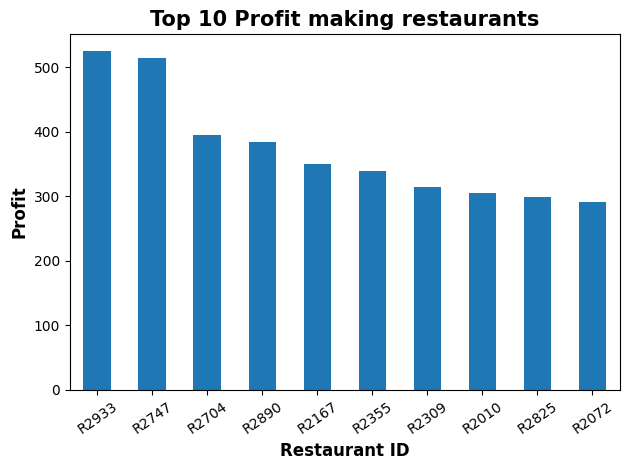

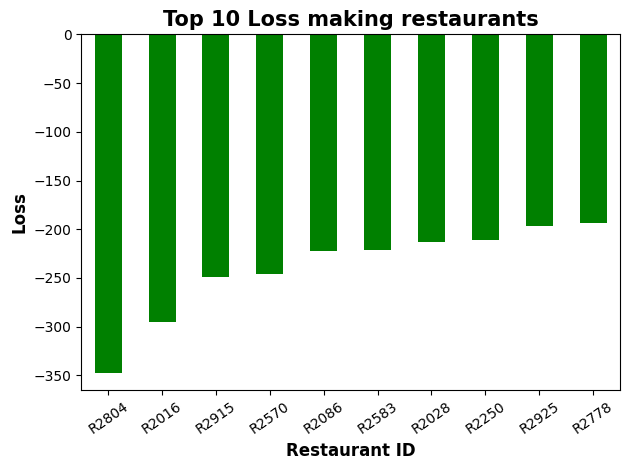

In [26]:
# List of top 10 restaurants based on profit and loss

food_delivery_cost.groupby('Restaurant ID')['profit'].sum().nlargest(10).plot(kind = 'bar')
plt.title("Top 10 Profit making restaurants", fontsize = 15, fontweight = 'bold')
plt.xlabel('Restaurant ID', fontsize = 12, fontweight = 'semibold')
plt.ylabel('Profit', fontsize = 12, fontweight = 'semibold')
plt.xticks(rotation = 35)
plt.tight_layout()
plt.show()

food_delivery_cost.groupby('Restaurant ID')['profit'].sum().nsmallest(10).plot(kind = 'bar', color = "green")
plt.title("Top 10 Loss making restaurants", fontsize = 15, fontweight = 'bold')
plt.xlabel('Restaurant ID', fontsize = 12, fontweight = 'semibold')
plt.ylabel('Loss', fontsize = 12, fontweight = 'semibold')
plt.xticks(rotation = 35)
plt.tight_layout()
plt.show()

Most Profit has been earned by **R2933** and **R2747**.

Most Loss has been made by **R2804** and **R2016**.

> ## Cost Analysis

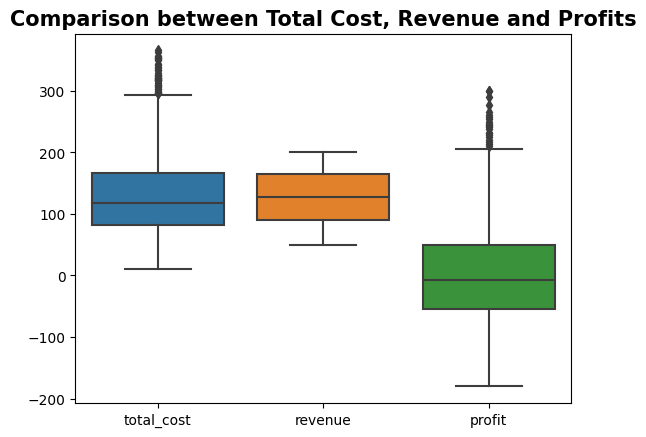

In [27]:
# comparison between total cost, revenue and profits
sns.boxplot(data = food_delivery_cost[['total_cost', 'revenue', 'profit']])
plt.title('Comparison between Total Cost, Revenue and Profits', fontsize = 15, fontweight = 'bold')
plt.show()

We observe that although the cost and revenue is high, profit is minimal.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


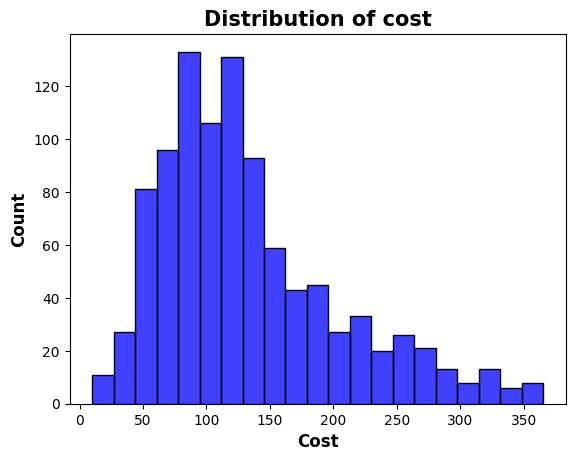

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


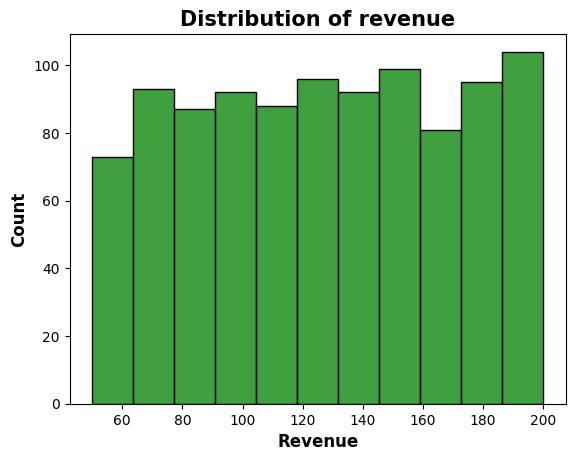

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


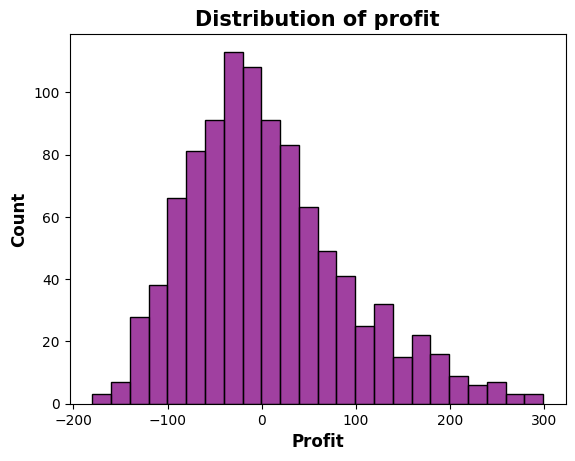

In [29]:
# Visualising the distribution of cost, profit and revenue
sns.histplot(food_delivery_cost['total_cost'], color = "blue")
plt.title("Distribution of cost", fontsize = 15, fontweight = 'bold')
plt.xlabel('Cost', fontsize = 12, fontweight = 'semibold')
plt.ylabel('Count', fontsize = 12, fontweight = 'semibold')
plt.show()

sns.histplot(food_delivery_cost['revenue'], color = "green")
plt.title("Distribution of revenue", fontsize = 15, fontweight = 'bold')
plt.xlabel('Revenue', fontsize = 12, fontweight = 'semibold')
plt.ylabel('Count', fontsize = 12, fontweight = 'semibold')
plt.show()

sns.histplot(food_delivery_cost['profit'], color = "purple")
plt.title("Distribution of profit", fontsize = 15, fontweight = 'bold')
plt.xlabel('Profit', fontsize = 12, fontweight = 'semibold')
plt.ylabel('Count', fontsize = 12, fontweight = 'semibold')
plt.show()

> ## Revenue Analysis

The **Commission Fee** is the only source of revenue.

In [32]:
food_delivery_cost[['Commission Fee', 'revenue', 'commision_percentage']].agg(['mean', 'min', 'max'])

,Commission Fee,revenue,commision_percentage
mean,126.99,126.99,19.75
min,50.00,50.00,2.61
max,200.00,200.00,169.09


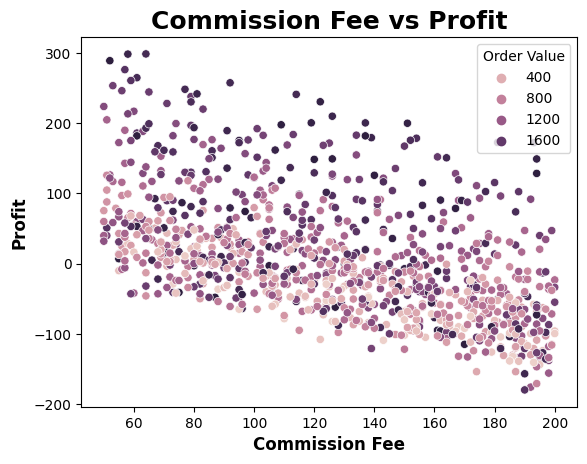

In [35]:
# Commission Fee, profit and order value scatter plot
sns.scatterplot(
    data=food_delivery_cost,
    x = 'Commission Fee',
    y = 'profit',
    hue = 'Order Value'
)
plt.title("Commission Fee vs Profit", fontsize = 18, fontweight = 'bold')
plt.xlabel('Commission Fee', fontsize = 12, fontweight = 'semibold')
plt.ylabel('Profit', fontsize = 12, fontweight = 'semibold')
plt.show()

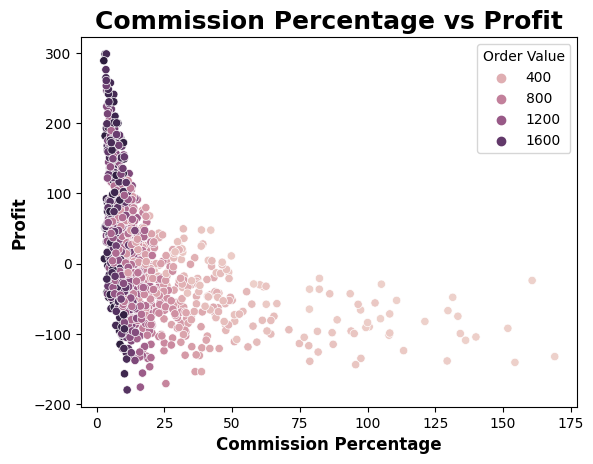

In [36]:
# Commission Fee, profit and order value scatter plot
sns.scatterplot(
    data=food_delivery_cost,
    x = 'commision_percentage',
    y = 'profit',
    hue = 'Order Value'
)
plt.title("Commission Percentage vs Profit", fontsize = 18, fontweight = 'bold')
plt.xlabel('Commission Percentage', fontsize = 12, fontweight = 'semibold')
plt.ylabel('Profit', fontsize = 12, fontweight = 'semibold')
plt.show()

Most of the *profits and losses* are incurred when the **commission percentage is less than 50**. It also indicates that *higher commission percentages* are applied when avergae order value is **more than 400**.

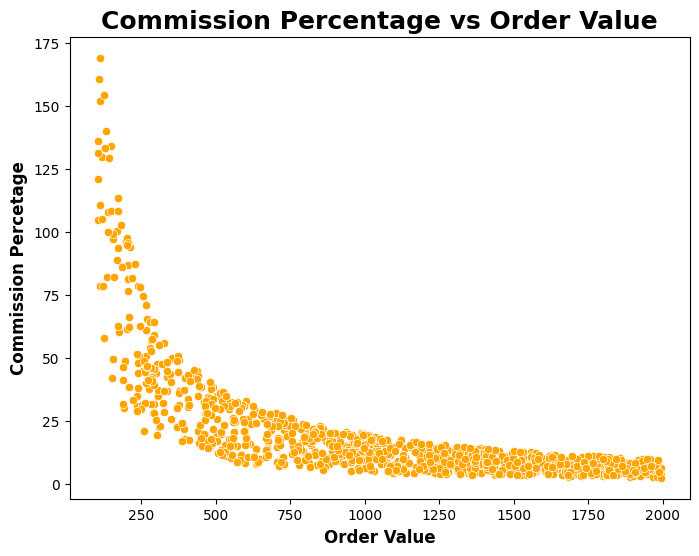

In [42]:
# plot against order value and commission percentage
plt.figure(figsize = (8,6))
sns.scatterplot(
    x = 'Order Value', 
    y = 'commision_percentage', 
    data = food_delivery_cost,
    color="orange"
)
plt.title("Commission Percentage vs Order Value", fontsize = 18, fontweight = 'bold')
plt.xlabel('Order Value', fontsize = 12, fontweight = 'semibold')
plt.ylabel('Commission Percetage', fontsize = 12, fontweight = 'semibold')
plt.show()

It proves the previous indication that the higher the order value, the lower the commission percentage. Similarly, the commission percentage is exponentially increased when the order value is low.

> ## Profitability Analysis

In [40]:
food_delivery_cost[['total_cost', 'revenue', 'profit']].agg(['sum', 'mean', 'min', 'max'])

,total_cost,revenue,profit
sum,132741.85,126990.00,5751.85
mean,132.74,126.99,5.75
min,10.00,50.00,-180.00
max,365.40,200.00,298.90
